In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/81-90.csv')

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [4]:
X = df[['univ_rank', 'cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021']]

# Extract the target variable (citation numbers for 2022)
y = df['cit_2022']

####Without dimentionality reduction and using StandardScalar library

In [5]:
scalar = StandardScaler()

In [6]:
Xscaled = scalar.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.2, random_state=42)


In [7]:
Xscaled.shape

(100, 6)

In [8]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9106232859190013

In [9]:
y_pred = model.predict(X_test)

In [10]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 58.79006409807439


####Using PCA dimentionality reduction
#####Number of components = 5

In [11]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
X_pca.shape

(100, 5)

In [12]:
pca.explained_variance_ratio_

array([0.92424391, 0.06634077, 0.00481844, 0.00249632, 0.00207168])

In [13]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [14]:
# Initialize the linear regression model
model_pca = LinearRegression()

# Fit the model on the training data
model_pca.fit(X_train_pca, y_train_pca)
model_pca.score(X_test_pca,y_test_pca)

0.9111373278406364

In [15]:
y_pred_pca = model_pca.predict(X_test_pca)

In [16]:
mae = mean_absolute_error(y_test_pca, y_pred_pca)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 59.45041095742939


In [17]:
# Transform the entire dataset with PCA
X_full_pca = pca.transform(X)

# Predict 2022 citation numbers for the entire dataset
full_predictions = model_pca.predict(X_full_pca)

print("Predicted values for 2022 citation",full_predictions)


Predicted values for 2022 citation [ 199.35944589  309.39907586  259.30617626  250.59139021  403.3289836
  373.43275039  197.57125569  109.42085095   73.80449193  134.39691141
  241.99810443  310.85024174  213.77440939  106.058343    870.10897814
   91.78526729  199.13951719  165.31863621  820.68144726   72.16901135
  236.8434599    74.15342145  304.7297415   133.83882901  210.69715157
  171.70663797  203.91889104  109.25287674  234.70201522  233.27198644
  335.65355604  183.23574309  268.43020346  442.01145378   96.1184015
   42.71759602   41.26677711  335.01693794  227.92754377  364.74929054
  410.12427991   92.3559956   184.85731651  234.47026783   60.479717
  188.00066965  156.22869745  451.09114397  134.29574786  328.57231969
  123.30443732   79.86704059  545.30878006  327.32556719   34.3586753
    8.96840014  406.44031427  229.4594048    87.16411117  221.45831407
  241.05963659  329.69887733  431.22142791  382.97732698  101.63524796
  196.29819912   81.69445425   34.18154047   87

#####Number of components = 2

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(100, 2)

In [19]:
pca.explained_variance_ratio_

array([0.92424391, 0.06634077])

In [20]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [21]:
# Initialize the linear regression model
model_pca = LinearRegression()

# Fit the model on the training data
model_pca.fit(X_train_pca, y_train_pca)
model_pca.score(X_test_pca,y_test_pca)

0.8440573287473303

In [22]:
y_pred_pca = model_pca.predict(X_test_pca)

In [23]:
mae = mean_absolute_error(y_test_pca, y_pred_pca)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 55.317413492188294


In [24]:
# Transform the entire dataset with PCA
X_full_pca = pca.transform(X)

# Predict 2022 citation numbers for the entire dataset
full_predictions = model_pca.predict(X_full_pca)

print("Predicted values for 2022 citation",full_predictions)


Predicted values for 2022 citation [ 293.10344774  408.96366787  220.39149459  259.85370774  400.63321468
  403.88581881  171.62328629  152.06818969   99.30632444  134.96422325
  217.86508287  265.1097435   249.27964741  137.53213279  805.81524244
  119.61945324  230.85788154  142.68446344  652.34909324   87.33689297
  272.58696234  100.06474811  421.21176389  160.16260774  165.63652127
  146.80702219  210.54182451  130.01941534  259.60429689  182.84136575
  378.92430534  177.63900657  274.32135103  453.03962649  160.93762319
   35.4920236    26.01110968  383.46331636  180.8262157   305.44691375
  388.04542814   72.93675829  187.99557738  279.19844234   78.68397436
  200.56083848  177.89049454  494.10850876  112.89448002  382.12659875
  152.69729497  129.10973275  572.4621364   322.40409453   30.54466739
   20.57665837  377.98332924  231.06929479   91.69040428  217.31530031
  304.07584742  291.02948711  344.2252588   355.9039333   107.69418149
  203.84104991  100.89257948   25.89132332

####Scatter Plot whose axes are the two most important principal components.


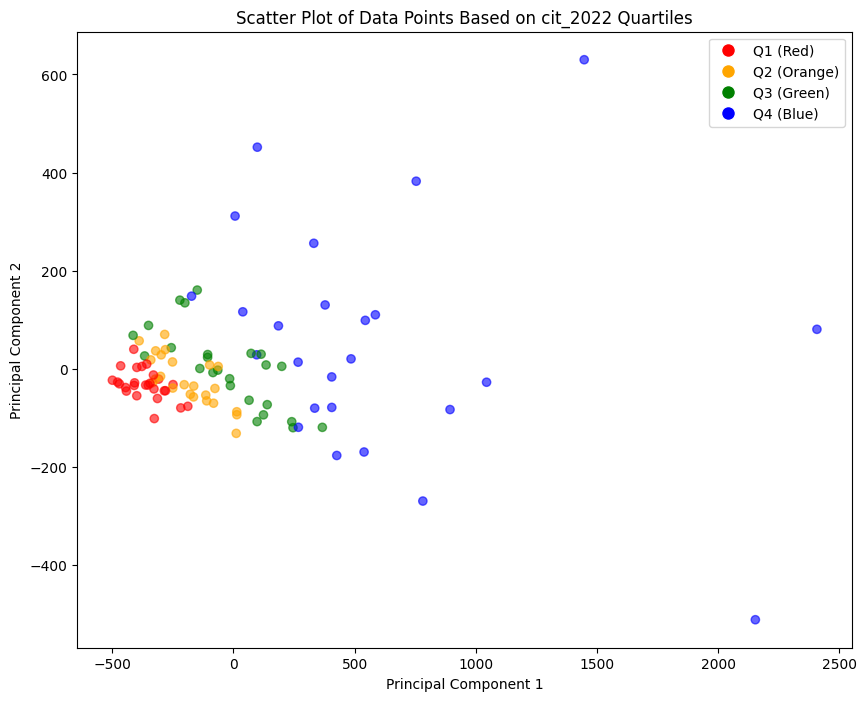

In [31]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/81-90.csv')

# Extract features (university rank and citation numbers from 2017 to 2022)
X_citations = data[['univ_rank', 'cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021']]

# Extract the target variable (i10-index)
y_2022 = data['cit_2022']

# Initialize PCA with the number of components you want to retain
pca = PCA(n_components=2)  # You can adjust the number of components as needed

# Fit and transform the citation data using PCA
X_pca = pca.fit_transform(X_citations)

# Combine PCA components with university rank
X_combined = pd.concat([data['univ_rank'], pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])], axis=1)

# Calculate the quartiles for the i10-index
quartiles = y_2022.quantile([0, 0.25, 0.5, 0.75, 1.0])

# Assign colors to data points based on quartiles
colors = []
for i10 in y_2022:
    if i10 <= quartiles[0.25]:
        colors.append('red')
    elif quartiles[0.25] < i10 <= quartiles[0.5]:
        colors.append('orange')
    elif quartiles[0.5] < i10 <= quartiles[0.75]:
        colors.append('green')
    else:
        colors.append('blue')

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_combined['PCA1'], X_combined['PCA2'], c=colors, alpha=0.6)

# Set plot labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Data Points Based on cit_2022 Quartiles')

# Show the legend
red_patch = plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='red', label='Q1 (Red)')
orange_patch = plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='orange', label='Q2 (Orange)')
green_patch = plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='green', label='Q3 (Green)')
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='blue', label='Q4 (Blue)')
plt.legend(handles=[red_patch, orange_patch, green_patch, blue_patch], loc='best')

# Show the scatter plot
plt.show()
